# 1. IMPORTING LIBREARY:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import operator


from collections import Counter
from tqdm import tqdm

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. DATASET:

In [118]:
dataset = pd.read_csv('/content/drive/My Drive/iNuron/RestaurantRatings/TA_restaurants_curated.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head(5)

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


# 3. RENAME THE DATASET COLUMNS:

In [119]:
old_column_name = list(dataset.columns)
new_column_name = []
for i in range(dataset.shape[1]):
    word = dataset.columns[i].lower()
    word = re.sub(' ', '_', word)
    new_column_name.append(word)

print('old_column_name: ', old_column_name)
print('\nnew_column_name: ', new_column_name)




# Rename the dataset columns
for i in range(len(old_column_name)):
    dataset = dataset.rename(columns={old_column_name[i] : new_column_name[i]})
dataset.head(2)

old_column_name:  ['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA']

new_column_name:  ['name', 'city', 'cuisine_style', 'ranking', 'rating', 'price_range', 'number_of_reviews', 'reviews', 'url_ta', 'id_ta']


,name,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419


# 4. EDA:

### 4.1 Null values:

24 % : Null values of cuisine_style
7 % : Null values of ranking:
7 % : Null values of rating:
38 % : Null values of price_range:
13 % : Null values of number_of_reviews:
7 % : Null values of reviews:


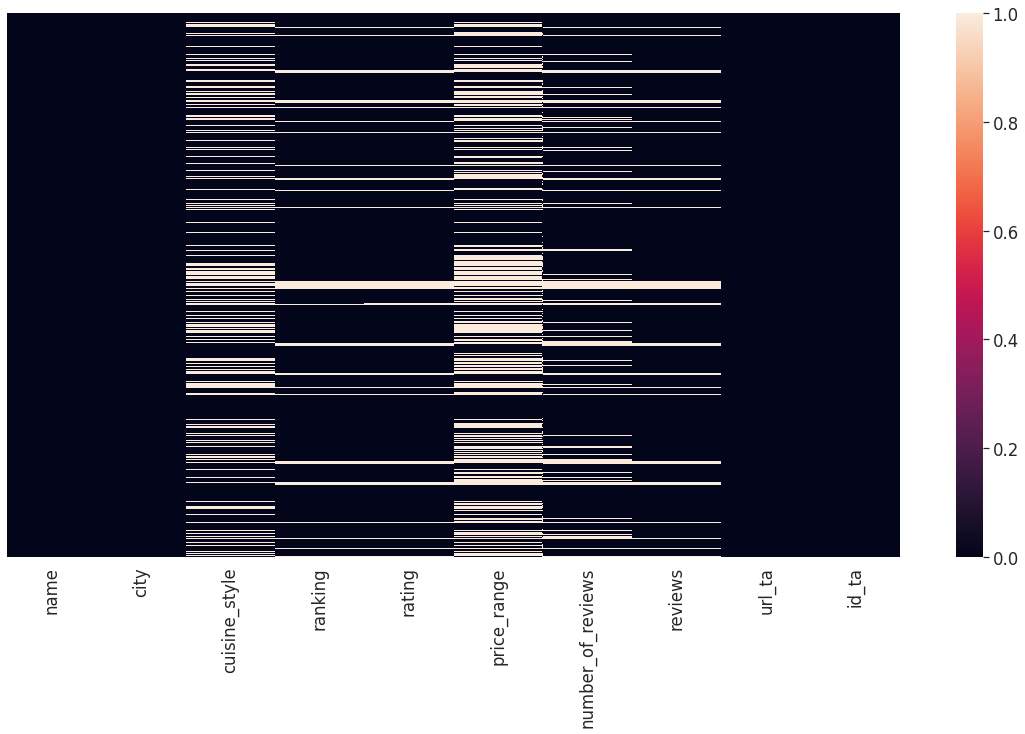

In [120]:
print(int((dict(dataset['cuisine_style'].isna().value_counts())[True] / dataset.shape[0]) * 100), '%', ': Null values of cuisine_style')
print(int((dict(dataset['ranking'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of ranking:')
print(int((dict(dataset['rating'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of rating:')
print(int((dict(dataset['price_range'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of price_range:')
print(int((dict(dataset['number_of_reviews'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of number_of_reviews:')
print(int((dict(dataset['reviews'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of reviews:', )

sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [121]:
print(dataset.groupby('city')['name'].value_counts())
city_names=dataset.city.unique()

city       name           
Amsterdam  New York Pizza     15
           Bagels & Beans     11
           Febo                7
           Amsterdam           6
           Burger Bar          4
                              ..
Zurich     tibits Oerlikon     1
           tre fratelli        1
           vis-a-vis           1
           xenix - summer      1
           zaehringer cafe     1
Name: name, Length: 118020, dtype: int64


### 4.2 Relation between `ranking` & `rating`:

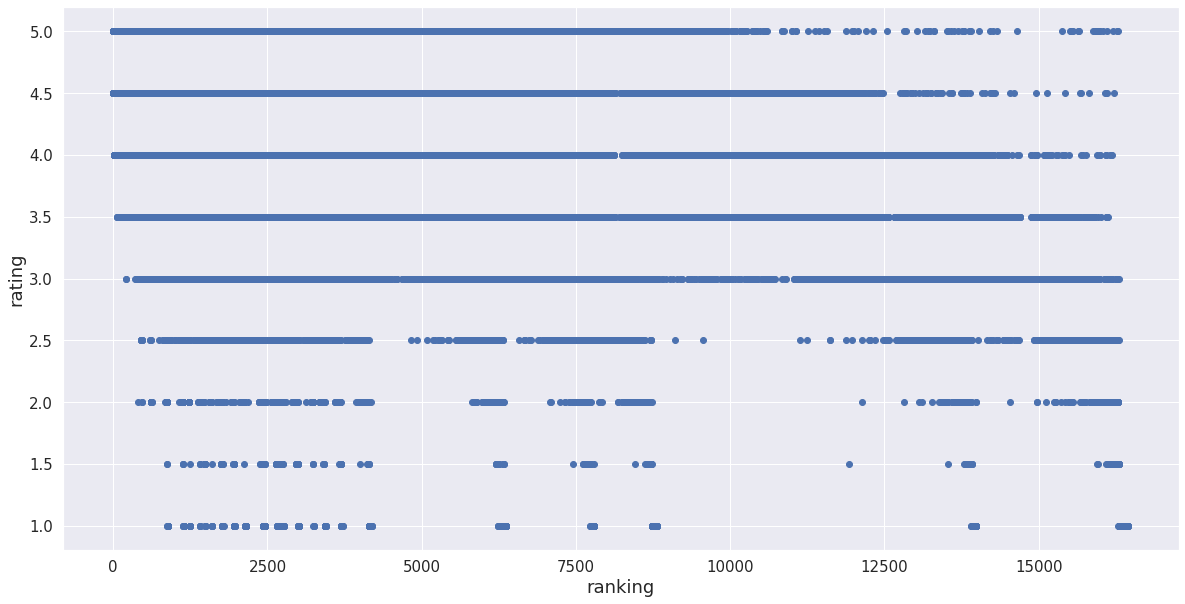

In [122]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.scatter(dataset['ranking'],dataset['rating'])
plt.xlabel('ranking', fontsize=18)
plt.ylabel('rating', fontsize=18)
plt.show()

### 4.2 `rating` distribution:

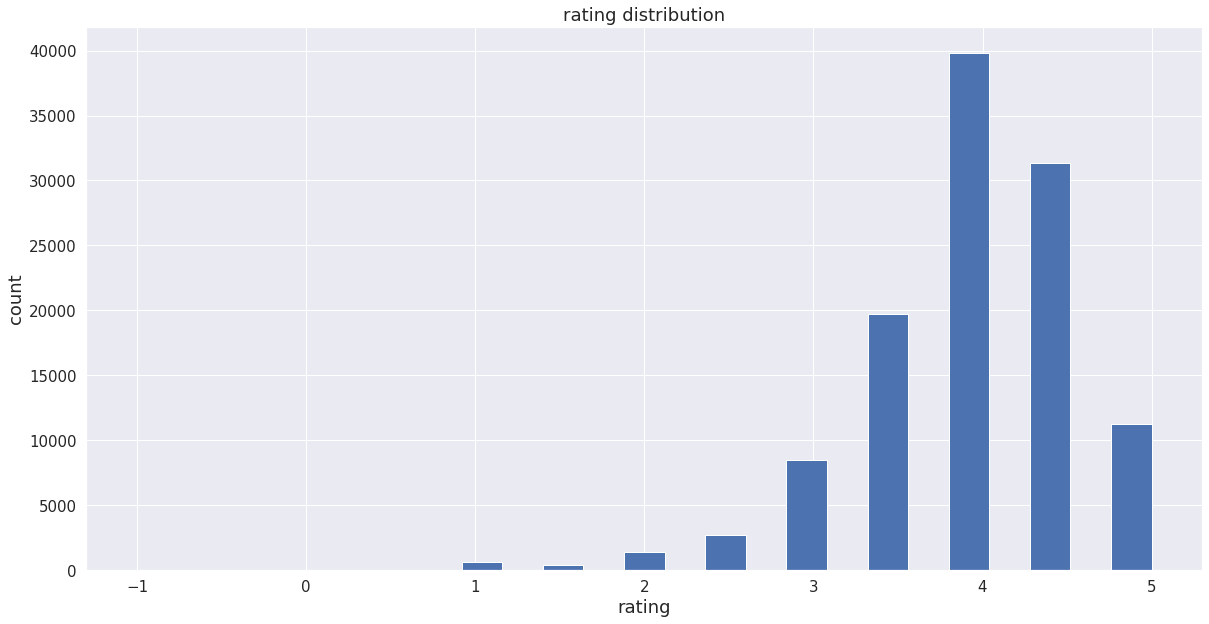

In [123]:
dataset['rating'].hist(bins=25, figsize=(20,10))
plt.xlabel('rating', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('rating distribution')
plt.show()

### 4.3 Relation between `ranking` & `counts`:

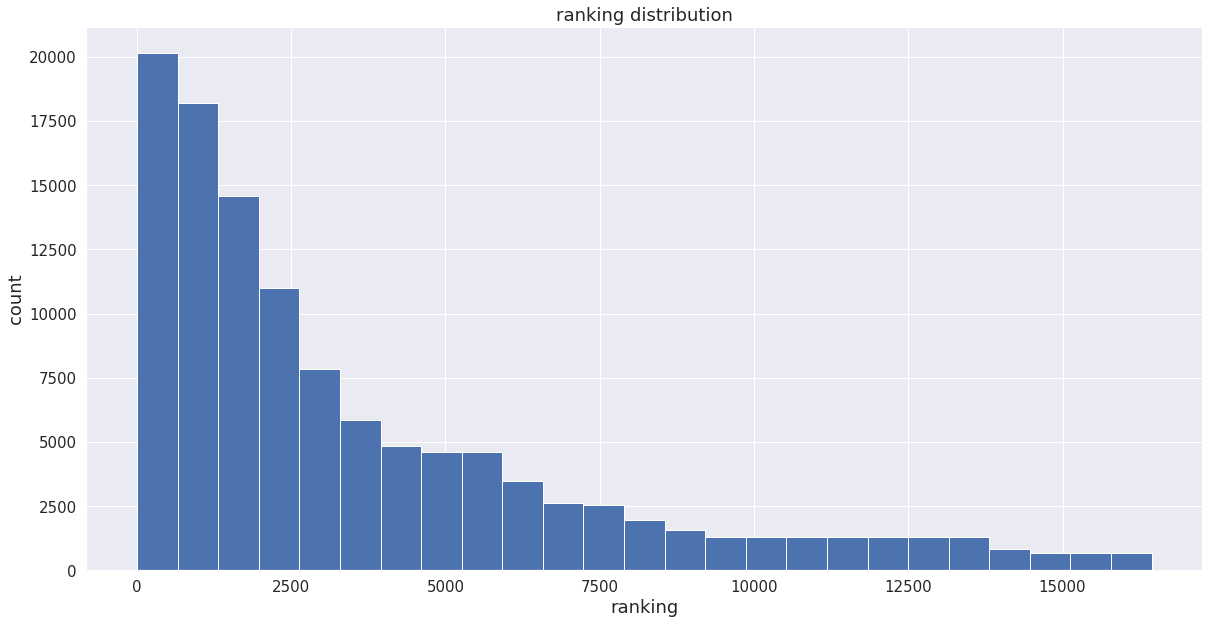

In [124]:

dataset['ranking'].hist(bins=25)
plt.xlabel('ranking', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('ranking distribution', fontsize=18)
plt.show()

### 4.4 Relation between `number_of_reviews` & `counts`:

2.0       5698
3.0       4687
4.0       3820
5.0       3388
6.0       2968
          ... 
1164.0       1
1768.0       1
2783.0       1
2677.0       1
1543.0       1
Name: number_of_reviews, Length: 2079, dtype: int64


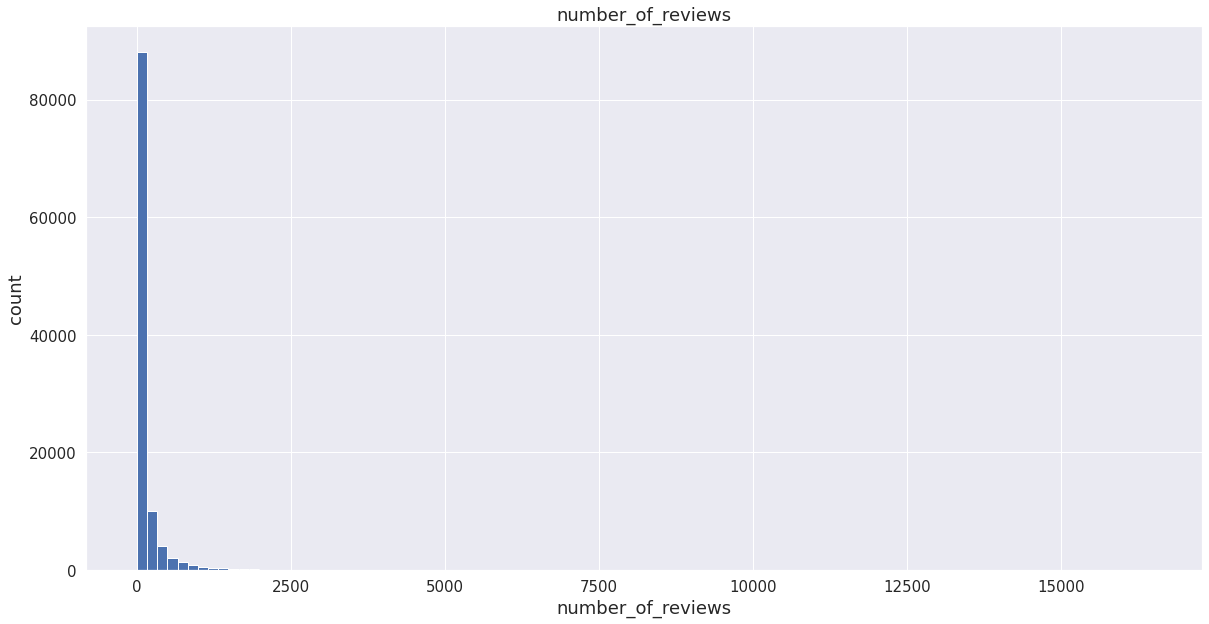

In [125]:
print(dataset['number_of_reviews'].value_counts())
dataset['number_of_reviews'].hist(bins=100)
plt.xlabel('number_of_reviews')
plt.ylabel('count')
plt.title('number_of_reviews')
plt.show()

### 4.4 Relation between `number_of_reviews` & `ranking`:

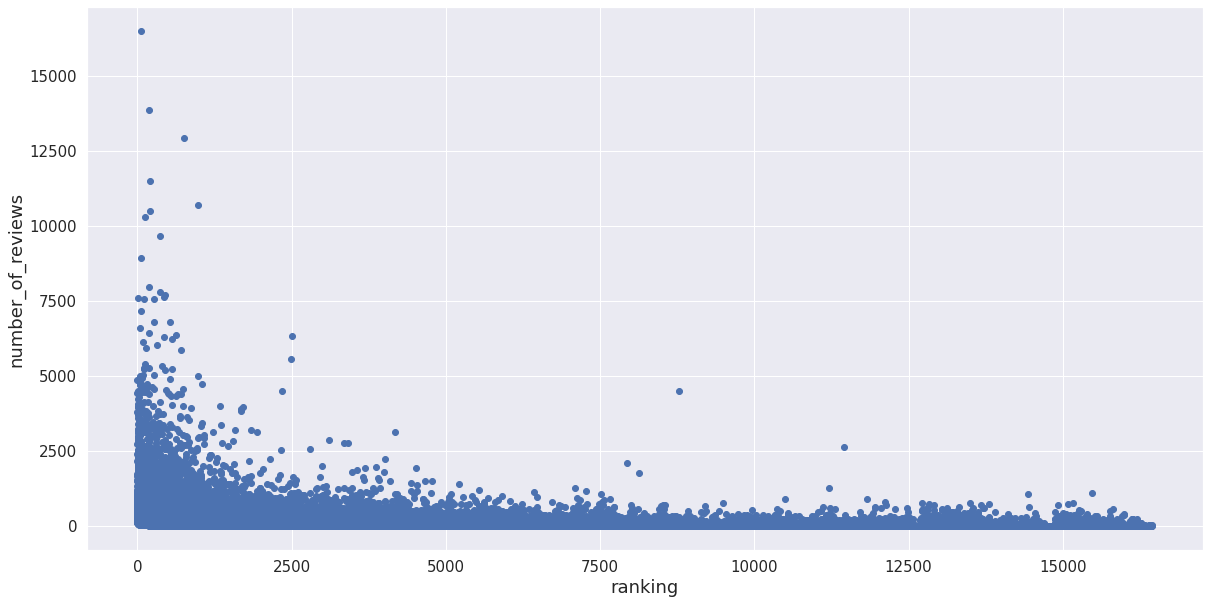

In [126]:
plt.scatter(dataset['ranking'],dataset['number_of_reviews'])
plt.xlabel('ranking')
plt.ylabel('number_of_reviews')
plt.show()

# 5. INITIAL NULL VALUES:

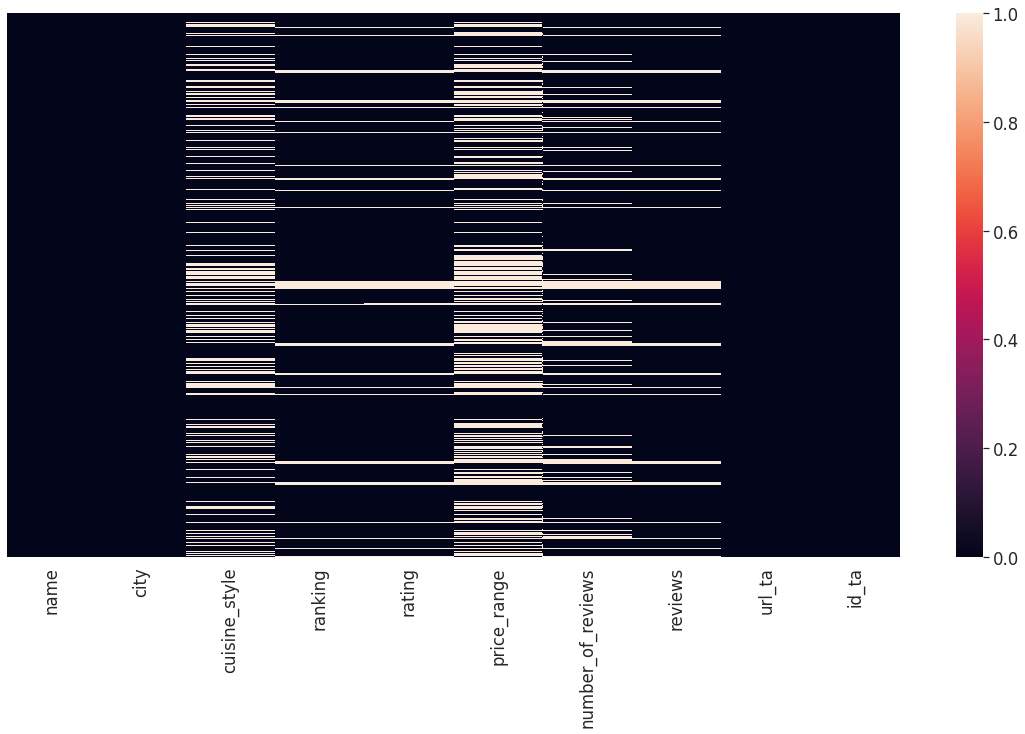

In [127]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5)
sns.heatmap(dataset.isnull(), yticklabels=False)

# 6. NULL VALUE REPLACEMENT: `cuisine_style` 

In [0]:
# Python3 program to ways to convert 
# list enclosed within string to list 

def convert(lst):
	return eval(lst)

**In this shell we are converting all the `cuisine_style` name to lower case.**

In [0]:
# for i in tqdm(range(dataset.shape[0])):
#     if type(dataset['cuisine_style'][i]) == str:
#         temp_list = []
#         for word in convert(dataset['cuisine_style'][i]):
#             word = word.lower()
#             word = re.sub(' ', '_', word)
#             temp_list.append(word)
#         dataset.loc[i, 'cuisine_style'] = str(temp_list)
#     else:
#         pass
# dataset.to_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point1.csv')

**Above shell is taking toomuch time so I save this file to `check_point1.csv`**

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/iNuron/RestaurantRatings/check_point1.csv')

**Creating new unique `cuisine_style_list`**

In [131]:
cuisine_style_list = []
for i in tqdm(range(dataset.shape[0])):
    if type(dataset['cuisine_style'][i]) == str:
        cuisine_style_list.extend(convert(dataset['cuisine_style'][i]))
    else:
        pass

100%|██████████| 125527/125527 [00:04<00:00, 28144.64it/s]


In [132]:
dataset['cuisine_style'].isna().value_counts()

False    94176
True     31351
Name: cuisine_style, dtype: int64

In [133]:
unique_cuisine_style_dict = dict(Counter(cuisine_style_list))
unique_cuisine_style_dict = dict(sorted(unique_cuisine_style_dict.items(), key=operator.itemgetter(1), reverse=True))
unique_cuisine_style_dict

{'afghani': 73,
 'african': 486,
 'albanian': 21,
 'american': 4052,
 'arabic': 175,
 'argentinean': 527,
 'armenian': 42,
 'asian': 9064,
 'australian': 87,
 'austrian': 1183,
 'azerbaijani': 6,
 'balti': 235,
 'bangladeshi': 239,
 'bar': 9690,
 'barbecue': 1676,
 'belgian': 848,
 'brazilian': 377,
 'brew_pub': 744,
 'british': 4836,
 'burmese': 5,
 'cafe': 7392,
 'cajun_&_creole': 72,
 'cambodian': 49,
 'canadian': 20,
 'caribbean': 330,
 'caucasian': 15,
 'central_american': 382,
 'central_asian': 31,
 'central_european': 4160,
 'chilean': 28,
 'chinese': 3690,
 'colombian': 85,
 'contemporary': 1619,
 'croatian': 84,
 'cuban': 80,
 'czech': 1937,
 'danish': 540,
 'delicatessen': 1155,
 'diner': 989,
 'dutch': 888,
 'eastern_european': 1470,
 'ecuadorean': 23,
 'egyptian': 67,
 'ethiopian': 123,
 'european': 30228,
 'fast_food': 5113,
 'filipino': 47,
 'french': 9558,
 'fujian': 6,
 'fusion': 1868,
 'gastropub': 1462,
 'georgian': 36,
 'german': 2075,
 'gluten_free_options': 12120,


**Most popular dish is `vegetarian_friendly`**

**So we can use the mode value replacement**

In [134]:
for i in tqdm(range(dataset.shape[0])):
    if type(dataset['cuisine_style'][i]) == str:
        pass
    else:
        dataset.loc[i, 'cuisine_style'] = str(['vegetarian_friendly'])

100%|██████████| 125527/125527 [01:13<00:00, 1698.71it/s]


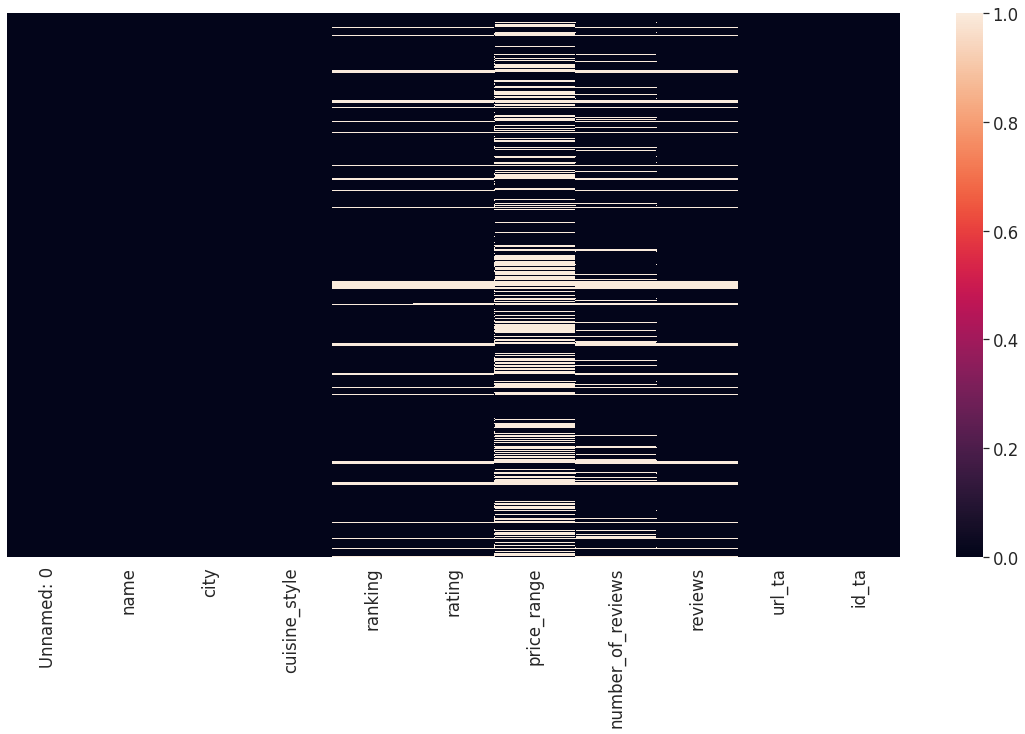

In [135]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [0]:
# dataset.to_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point2.csv')
dataset = pd.read_csv('/content/drive/My Drive/iNuron/RestaurantRatings/check_point2.csv')

# 7. NULL VALUE REPLACEMENT: `number_of_reviews`

**1st we will `delete outlier` data points then apply the `mean value` replacement.**

**There are `17344` null values in `number_of_reviews`**

In [137]:
dataset['number_of_reviews'].isna().value_counts()

False    108183
True      17344
Name: number_of_reviews, dtype: int64

In [138]:
dataset['number_of_reviews']

0         136.0
1         812.0
2         567.0
3         564.0
4         316.0
          ...  
125522      NaN
125523      NaN
125524      NaN
125525      NaN
125526      NaN
Name: number_of_reviews, Length: 125527, dtype: float64

In [139]:
dataset['number_of_reviews'].mean()

125.18498285312849

In [140]:
dataset['number_of_reviews'].median()

32.0

**So we can use the `median value` replacement**

In [0]:
dataset['number_of_reviews'] = dataset['number_of_reviews'].fillna(dataset['number_of_reviews'].median())

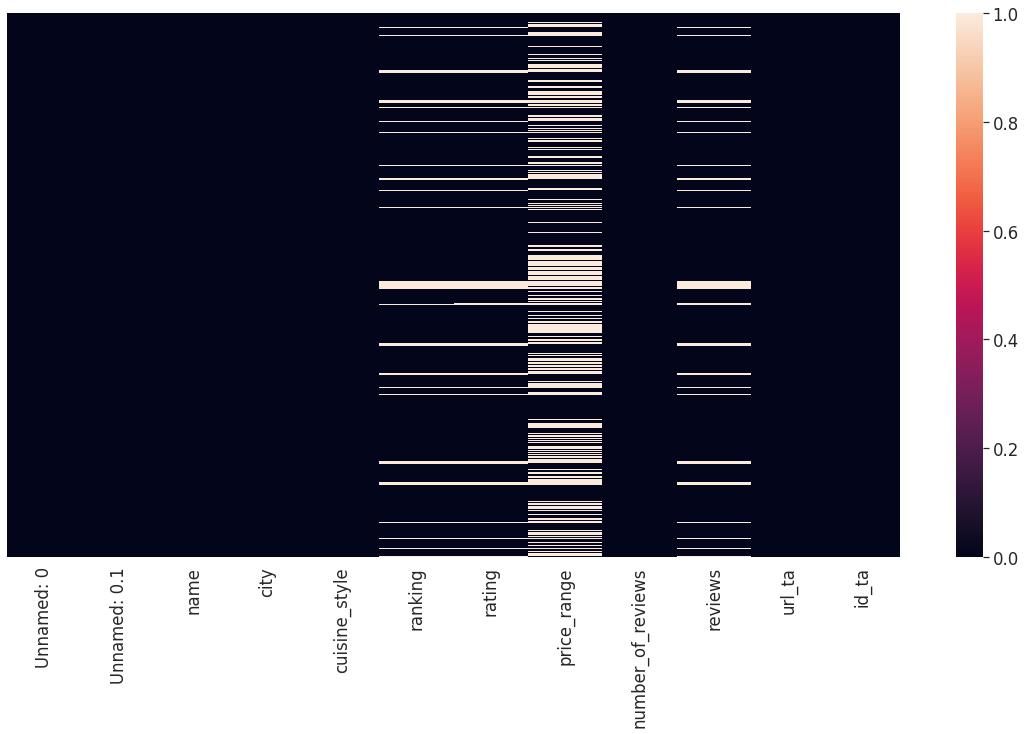

In [142]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


# 8. NULL VALUE REPLACEMENT: `price_range`

**There are `47855` null values in `price_range`**

In [143]:
dataset['price_range'].isna().value_counts()

False    77672
True     47855
Name: price_range, dtype: int64

**So we can use the `mode value` replacement**

In [0]:
dataset['price_range'] = dataset['price_range'].fillna(dataset['price_range'].mode()[0])

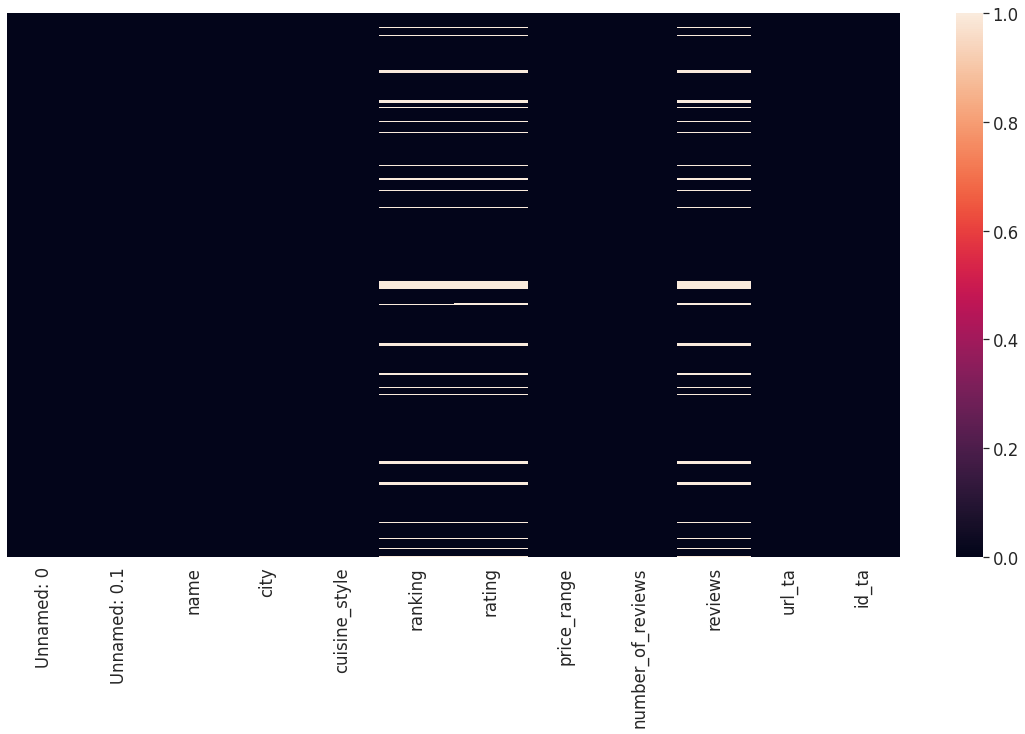

In [145]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


# 9. NULL VALUE REPLACEMENT: `reviews`

**Here we will `delete all rows` because it is a text data column we `can't use mean, median, mode value replacement`**

In [146]:
dataset['reviews']

0         [['Just like home', 'A Warm Welcome to Wintry ...
1         [['Great food and staff', 'just perfect'], ['0...
2         [['Satisfaction', 'Delicious old school restau...
3         [['True five star dinner', 'A superb evening o...
4         [['Best meal.... EVER', 'super food experience...
                                ...                        
125522                                                  NaN
125523                                                  NaN
125524                                                  NaN
125525                                                  NaN
125526                                                  NaN
Name: reviews, Length: 125527, dtype: object

In [147]:
dataset['reviews'].isna().value_counts()

False    115911
True       9616
Name: reviews, dtype: int64

In [0]:
# dataset['reviews'].dropna(axis=0, inplace=True)
dataset = dataset[dataset['reviews'].notna()]

In [149]:
dataset['reviews']

0         [['Just like home', 'A Warm Welcome to Wintry ...
1         [['Great food and staff', 'just perfect'], ['0...
2         [['Satisfaction', 'Delicious old school restau...
3         [['True five star dinner', 'A superb evening o...
4         [['Best meal.... EVER', 'super food experience...
                                ...                        
125450                                             [[], []]
125451    [['Poor quality, small portions, miserable st....
125452                                             [[], []]
125453                                             [[], []]
125454                                             [[], []]
Name: reviews, Length: 115911, dtype: object

In [150]:
dataset['reviews'].isna().value_counts()

False    115911
Name: reviews, dtype: int64

In [151]:
dataset.isna().sum()

Unnamed: 0             0
Unnamed: 0.1           0
name                   0
city                   0
cuisine_style          0
ranking              164
rating                19
price_range            0
number_of_reviews      0
reviews                0
url_ta                 0
id_ta                  0
dtype: int64

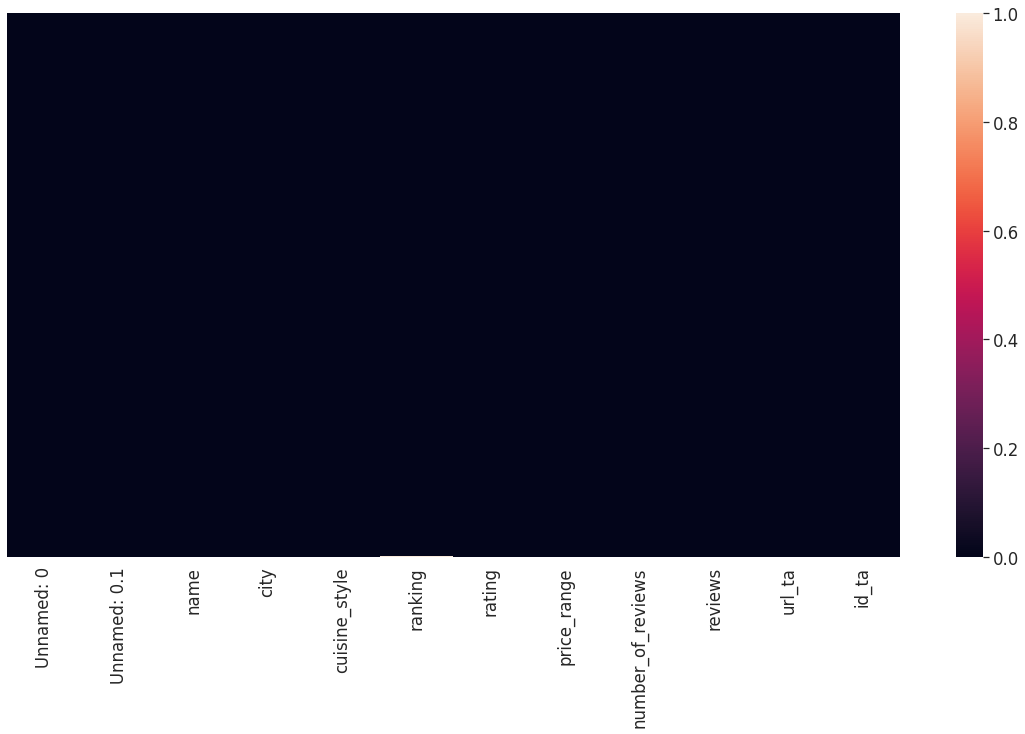

In [152]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


# 10. NULL VALUE REPLACEMENT:  `ranking`

**We can elemenate the null rows because only 164 null rows our of 115K rows**

In [153]:
dataset['ranking']

0            1.0
1            2.0
2            3.0
3            4.0
4            5.0
           ...  
125450    1596.0
125451    1597.0
125452    1598.0
125453    1601.0
125454       NaN
Name: ranking, Length: 115911, dtype: float64

Here we are replaceing the null value by `mean value` because we can't tell that a restaurant is best with out knowing the proper details. 

In [154]:
int(dataset['ranking'].mean())

3655

In [0]:
dataset = dataset.fillna(int(dataset['ranking'].mean()))

In [156]:
dataset['ranking'].isna().value_counts()

False    115911
Name: ranking, dtype: int64

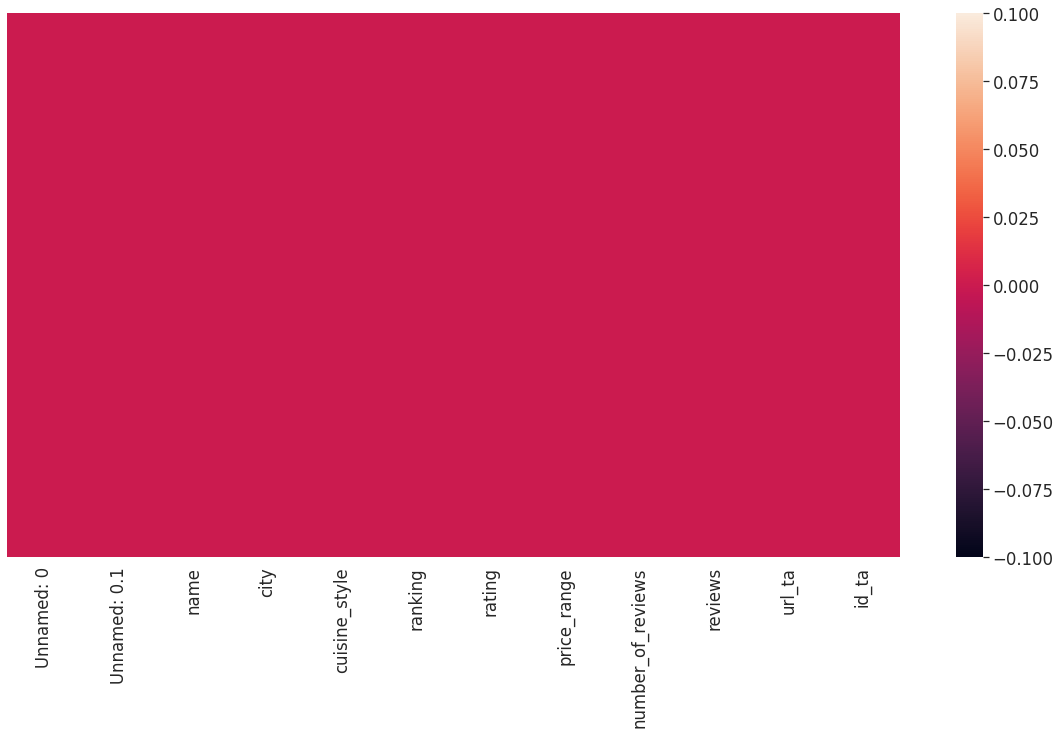

In [157]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [158]:
dataset.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
name                 0
city                 0
cuisine_style        0
ranking              0
rating               0
price_range          0
number_of_reviews    0
reviews              0
url_ta               0
id_ta                0
dtype: int64

In [159]:
# dataset.to_csv('/content/drive/My Drive/iNuron/RestaurantRatings/final_1.csv')
dataset = pd.read_csv('/content/drive/My Drive/iNuron/RestaurantRatings/final_1.csv')
dataset.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)
dataset

,name,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,Martine of Martine's Table,Amsterdam,"['french', 'dutch', 'european']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['dutch', 'european', 'vegetarian_friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,La Rive,Amsterdam,"['mediterranean', 'french', 'international', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,Vinkeles,Amsterdam,"['french', 'european', 'international', 'conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['dutch', 'european', 'international', 'vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...
115906,not guilty Bellevue,Zurich,"['international', 'european', 'contemporary', ...",1596.0,1.0,$$ - $$$,32.0,"[[], []]",/Restaurant_Review-g188113-d12378701-Reviews-N...,d12378701
115907,Ly's Take Away,Zurich,['vegetarian_friendly'],1597.0,1.0,$$ - $$$,2.0,"[['Poor quality, small portions, miserable st....",/Restaurant_Review-g188113-d12870151-Reviews-L...,d12870151
115908,Restaurant Gasthof Hirschen,Zurich,"['german', 'swiss', 'european', 'central_europ...",1598.0,1.0,$$ - $$$,2.0,"[[], []]",/Restaurant_Review-g188113-d12959896-Reviews-R...,d12959896
115909,Hukka Restaurant & Hookah Lounge,Zurich,"['german', 'belgian', 'mediterranean', 'europe...",1601.0,1.0,$$$$,32.0,"[[], []]",/Restaurant_Review-g188113-d11796028-Reviews-H...,d11796028


# 11. CATEGORICAL VALUE TO NUMERIC VALUE: `city`

In [160]:
temp_df = pd.get_dummies(dataset['city'], drop_first=True)
dataset = pd.concat([dataset, temp_df], axis=1)
dataset.drop('city', axis=1, inplace=True)
dataset

,name,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,Martine of Martine's Table,"['french', 'dutch', 'european']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,De Silveren Spiegel,"['dutch', 'european', 'vegetarian_friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,La Rive,"['mediterranean', 'french', 'international', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Vinkeles,"['french', 'european', 'international', 'conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Librije's Zusje Amsterdam,"['dutch', 'european', 'international', 'vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115906,not guilty Bellevue,"['international', 'european', 'contemporary', ...",1596.0,1.0,$$ - $$$,32.0,"[[], []]",/Restaurant_Review-g188113-d12378701-Reviews-N...,d12378701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
115907,Ly's Take Away,['vegetarian_friendly'],1597.0,1.0,$$ - $$$,2.0,"[['Poor quality, small portions, miserable st....",/Restaurant_Review-g188113-d12870151-Reviews-L...,d12870151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
115908,Restaurant Gasthof Hirschen,"['german', 'swiss', 'european', 'central_europ...",1598.0,1.0,$$ - $$$,2.0,"[[], []]",/Restaurant_Review-g188113-d12959896-Reviews-R...,d12959896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
115909,Hukka Restaurant & Hookah Lounge,"['german', 'belgian', 'mediterranean', 'europe...",1601.0,1.0,$$$$,32.0,"[[], []]",/Restaurant_Review-g188113-d11796028-Reviews-H...,d11796028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 12. CATEGORICAL VALUE TO NUMERIC VALUE: `price_range`

In [161]:
temp_df = pd.get_dummies(dataset['price_range'], drop_first=True)
dataset = pd.concat([dataset, temp_df], axis=1)
dataset.drop('price_range', axis=1, inplace=True)
dataset

,name,cuisine_style,ranking,rating,number_of_reviews,reviews,url_ta,id_ta,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,$$ - $$$,$$$$
0,Martine of Martine's Table,"['french', 'dutch', 'european']",1.0,5.0,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,De Silveren Spiegel,"['dutch', 'european', 'vegetarian_friendly', '...",2.0,4.5,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,La Rive,"['mediterranean', 'french', 'international', '...",3.0,4.5,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Vinkeles,"['french', 'european', 'international', 'conte...",4.0,5.0,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Librije's Zusje Amsterdam,"['dutch', 'european', 'international', 'vegeta...",5.0,4.5,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115906,not guilty Bellevue,"['international', 'european', 'contemporary', ...",1596.0,1.0,32.0,"[[], []]",/Restaurant_Review-g188113-d12378701-Reviews-N...,d12378701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
115907,Ly's Take Away,['vegetarian_friendly'],1597.0,1.0,2.0,"[['Poor quality, small portions, miserable st....",/Restaurant_Review-g188113-d12870151-Reviews-L...,d12870151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
115908,Restaurant Gasthof Hirschen,"['german', 'swiss', 'european', 'central_europ...",1598.0,1.0,2.0,"[[], []]",/Restaurant_Review-g188113-d12959896-Reviews-R...,d12959896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
115909,Hukka Restaurant & Hookah Lounge,"['german', 'belgian', 'mediterranean', 'europe...",1601.0,1.0,32.0,"[[], []]",/Restaurant_Review-g188113-d11796028-Reviews-H...,d11796028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


# 13. CATEGORICAL VALUE TO NUMERIC VALUE: `cuisine_style`

In [0]:
# Here I am trying to create a separate new column of each category which is present under cuisine_style.

# temp_df = pd.DataFrame()
# # Traverse all rows form 0 to 115911
# for i in tqdm(range(dataset.shape[0])):
#   # each element in a list like this list=====> ['Italian', 'Pizza', 'Mediterranean', 'Diner']
#   for cuisine_style in convert(dataset['cuisine_style'][i]):
#     # Traverse all elements in this list ==========> ['Italian', 'Pizza', 'Mediterranean', 'Diner']
#     for j in range(len(convert(dataset['cuisine_style'][i]))):
#       # Create new column in temp_df with sufix 'cs_' + 'cuision_style' name
#       # Plce that value 1 where the cuision_style match to the main data frame column "dataset['cuisine_style']" other wise None value
#       # later on we will replace the None value to ZERO
#       temp_df.loc[i, 'cs_'+cuisine_style] = np.where(convert(dataset['cuisine_style'][i])[j] == cuisine_style, 1, 1)

In [0]:
# temp_df.fillna(0, inplace=True)
# temp_df.shape


# (115911, 127)

In [0]:
# # We are merging the two data frame in a single data frame (dataset)
# dataset = pd.concat([dataset, temp_df], axis=1)

# # Drop the main column cuisine_style from main data frame because we have converted that data to numeric values
# dataset.drop('cuisine_style', axis=1, inplace=True)

# # Shape of the main data frame
# print(dataset.shape)

# # Head
# dataset.head(2)

In [0]:
# # I am saving the file to new csv file named as final_2 ===========> Check point
# dataset.to_csv('/content/drive/My Drive/iNuron/RestaurantRatings/final_2.csv')

In [166]:
dataset = pd.read_csv('/content/drive/My Drive/iNuron/RestaurantRatings/final_2.csv')

# We are droping the two columns 'url_ta' and 'id_a'
# Because all the restaurant have url and unique id, It will not give a greate impact on our target variable
dataset.drop(['Unnamed: 0', 'url_ta', 'id_ta'], axis=1, inplace=True)
dataset.head(2)

,name,ranking,rating,number_of_reviews,reviews,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,$$ - $$$,$$$$,cs_french,cs_dutch,cs_european,...,cs_austrian,cs_danish,cs_romanian,cs_cajun_&_creole,cs_georgian,cs_egyptian,cs_central_asian,cs_cuban,cs_russian,cs_czech,cs_armenian,cs_venezuelan,cs_bangladeshi,cs_scottish,cs_azerbaijani,cs_hungarian,cs_filipino,cs_croatian,cs_polish,cs_yunnan,cs_cambodian,cs_chilean,cs_mongolian,cs_uzbek,cs_xinjiang,cs_albanian,cs_ukrainian,cs_sri_lankan,cs_caucasian,cs_latvian,cs_salvadoran,cs_guatemalan,cs_native_american,cs_canadian,cs_slovenian,cs_polynesian,cs_puerto_rican,cs_welsh,cs_burmese,cs_fujian
0,Martine of Martine's Table,1.0,5.0,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,De Silveren Spiegel,2.0,4.5,812.0,"[['Great food and staff', 'just perfect'], ['0...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **14. NAME:**

In [0]:
# # Createing a new dict where we will store the unique restaurant name and it's value counts
# name_dict = dict(dataset['name'].value_counts())

# # Here we are replacing the the restaurant name to it's value count because there are some franchise of a restaurant
# for i in tqdm(range(dataset.shape[0])):
#   dataset.loc[i, 'name'] = name_dict[dataset['name'][i]]

# # check point
# dataset.to_csv('/content/drive/My Drive/iNuron/RestaurantRatings/final_3.csv')

In [168]:
dataset = pd.read_csv('/content/drive/My Drive/iNuron/RestaurantRatings/final_3.csv')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head(2)

,name,ranking,rating,number_of_reviews,reviews,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,$$ - $$$,$$$$,cs_french,cs_dutch,cs_european,...,cs_austrian,cs_danish,cs_romanian,cs_cajun_&_creole,cs_georgian,cs_egyptian,cs_central_asian,cs_cuban,cs_russian,cs_czech,cs_armenian,cs_venezuelan,cs_bangladeshi,cs_scottish,cs_azerbaijani,cs_hungarian,cs_filipino,cs_croatian,cs_polish,cs_yunnan,cs_cambodian,cs_chilean,cs_mongolian,cs_uzbek,cs_xinjiang,cs_albanian,cs_ukrainian,cs_sri_lankan,cs_caucasian,cs_latvian,cs_salvadoran,cs_guatemalan,cs_native_american,cs_canadian,cs_slovenian,cs_polynesian,cs_puerto_rican,cs_welsh,cs_burmese,cs_fujian
0,1,1.0,5.0,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,4.5,812.0,"[['Great food and staff', 'just perfect'], ['0...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 15. RANKING:

In [0]:
# rank_asc = np.sort(np.array(dataset['ranking']))
# rank_dsc = rank_asc[::-1]
# rank_dict = {}
# for i in tqdm(range(len(rank_asc))):
#   rank_dict[rank_asc[i]] = rank_dsc[i]

In [0]:
# for i in tqdm(range(dataset.shape[0])):
#   dataset.loc[i, 'ranking'] = rank_dict[dataset.loc[i, 'ranking']]
# dataset.to_csv('/content/drive/My Drive/iNuron/RestaurantRatings/final_4.csv')

In [171]:
dataset = pd.read_csv('/content/drive/My Drive/iNuron/RestaurantRatings/final_4.csv')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head(2)

,name,ranking,rating,number_of_reviews,reviews,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,$$ - $$$,$$$$,cs_french,cs_dutch,cs_european,...,cs_austrian,cs_danish,cs_romanian,cs_cajun_&_creole,cs_georgian,cs_egyptian,cs_central_asian,cs_cuban,cs_russian,cs_czech,cs_armenian,cs_venezuelan,cs_bangladeshi,cs_scottish,cs_azerbaijani,cs_hungarian,cs_filipino,cs_croatian,cs_polish,cs_yunnan,cs_cambodian,cs_chilean,cs_mongolian,cs_uzbek,cs_xinjiang,cs_albanian,cs_ukrainian,cs_sri_lankan,cs_caucasian,cs_latvian,cs_salvadoran,cs_guatemalan,cs_native_american,cs_canadian,cs_slovenian,cs_polynesian,cs_puerto_rican,cs_welsh,cs_burmese,cs_fujian
0,1,16410.0,5.0,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,16378.0,4.5,812.0,"[['Great food and staff', 'just perfect'], ['0...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 16. RATING:

In [172]:
dataset['rating']

0         5.0
1         4.5
2         4.5
3         5.0
4         4.5
         ... 
115906    1.0
115907    1.0
115908    1.0
115909    1.0
115910    3.0
Name: rating, Length: 115911, dtype: float64

In [0]:
dataset = dataset[dataset['rating'] > 1]
dataset = dataset[dataset['rating'] < 5]

In [179]:
print(dataset.shape)
dataset.head(2)

(103978, 164)


,name,ranking,rating,number_of_reviews,reviews,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,$$ - $$$,$$$$,cs_french,cs_dutch,cs_european,...,cs_austrian,cs_danish,cs_romanian,cs_cajun_&_creole,cs_georgian,cs_egyptian,cs_central_asian,cs_cuban,cs_russian,cs_czech,cs_armenian,cs_venezuelan,cs_bangladeshi,cs_scottish,cs_azerbaijani,cs_hungarian,cs_filipino,cs_croatian,cs_polish,cs_yunnan,cs_cambodian,cs_chilean,cs_mongolian,cs_uzbek,cs_xinjiang,cs_albanian,cs_ukrainian,cs_sri_lankan,cs_caucasian,cs_latvian,cs_salvadoran,cs_guatemalan,cs_native_american,cs_canadian,cs_slovenian,cs_polynesian,cs_puerto_rican,cs_welsh,cs_burmese,cs_fujian
1,1,16378.0,4.5,812.0,"[['Great food and staff', 'just perfect'], ['0...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,16345.0,4.5,567.0,"[['Satisfaction', 'Delicious old school restau...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
